<a href="https://colab.research.google.com/github/R4hulR/Irish-Classification-II-PyTorch/blob/main/Irish_Classification_II_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import torch
import pandas as pd
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline
print(torch.__version__)

2.3.1+cu121


In [32]:
#Create a Model Class that inherits nn.Module
class Model(nn.Module):
  #input layer (4 features of the flower) -->
  #Hidden layer1 (number of neurons) -->
  #H2(n) -->
  #ouput (3 classes of Iris flowers)
  def __init__(self,in_features=4,h1=8,h2=9,out_features=3) -> None:
    super().__init__()
    self.fc1 = nn.Linear(in_features,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out_features)
  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [33]:
torch.manual_seed(1)
model = Model()

In [34]:
import pandas as pd
from sklearn import datasets

In [35]:
iris = datasets.load_iris()
my_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
my_df['target'] = iris.target

In [36]:
my_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [37]:
from sklearn.model_selection import train_test_split
X = iris.data
y = iris.target

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2,random_state=1)

In [39]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [40]:
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [41]:
#Training
epochs = 1000
losses = []
for i  in range(epochs):
  #predict
  y_pred = model.forward(X_train)
  #measure loss
  loss_val = loss(y_pred,y_train)
  losses.append(loss_val.detach().numpy())
  if i%100 == 0:
    print(f"epoch {i} and loss {loss_val}")
  #optimize
  optimizer.zero_grad() #reset gradients to zero
  loss_val.backward() #Calculate gardients
  optimizer.step() #Update the model parameters


epoch 0 and loss 1.2199528217315674
epoch 100 and loss 0.8672245144844055
epoch 200 and loss 0.5550811886787415
epoch 300 and loss 0.35219982266426086
epoch 400 and loss 0.21509326994419098
epoch 500 and loss 0.1387104094028473
epoch 600 and loss 0.10246781259775162
epoch 700 and loss 0.08458507061004639
epoch 800 and loss 0.0748060867190361
epoch 900 and loss 0.06890211999416351


Text(0.5, 0, 'Epochs')

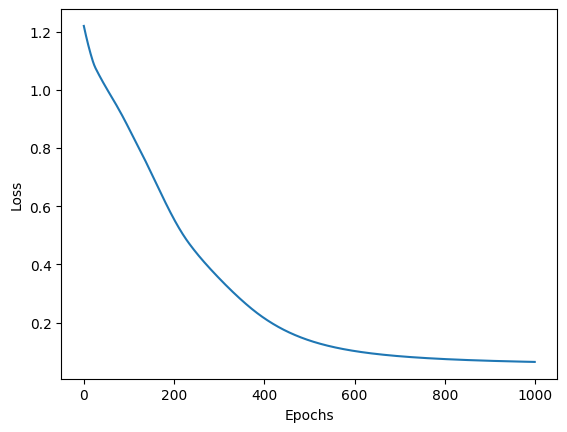

In [42]:
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('Epochs')

In [43]:
with torch.no_grad():
  y_val =  model.forward(X_test)
  loss= loss(y_val,y_test)
  print(loss)

tensor(0.0462)


In [44]:
correct = 0
with torch.no_grad():
  for i,data in enumerate(X_test):
    y_val = model.forward(data)
    print(f'{i+1}.) {str(y_val)} \t {y_test[i]}')
    if y_val.argmax().item() == y_test[i]:
      correct += 1
print(f'Accuracy: {correct/len(X_test)}')


1.) tensor([ 5.6680, -0.6126, -8.1855]) 	 0
2.) tensor([-0.4694,  2.8864, -2.4863]) 	 1
3.) tensor([-2.7777,  4.6210, -1.0547]) 	 1
4.) tensor([ 5.3316, -0.5568, -7.6763]) 	 0
5.) tensor([-6.2310,  2.6696,  5.2889]) 	 2
6.) tensor([-3.5098,  3.8002,  0.7487]) 	 1
7.) tensor([-5.4701,  2.2611,  4.7855]) 	 2
8.) tensor([ 4.8282, -0.3792, -7.0518]) 	 0
9.) tensor([ 4.7505, -0.4549, -6.8031]) 	 0
10.) tensor([-6.4289,  1.2999,  6.9864]) 	 2
11.) tensor([-2.8922,  3.7931,  0.0181]) 	 1
12.) tensor([ 5.2295, -0.5354, -7.5294]) 	 0
13.) tensor([-6.5531,  1.4815,  6.9619]) 	 2
14.) tensor([-3.0443,  4.4166, -0.4728]) 	 1
15.) tensor([-3.4591,  3.5821,  0.9312]) 	 1
16.) tensor([ 4.6358, -0.4300, -6.6372]) 	 0
17.) tensor([-2.3375,  4.1926, -1.1474]) 	 1
18.) tensor([-3.4882,  3.1077,  1.4648]) 	 1
19.) tensor([ 5.1357, -0.5084, -7.4063]) 	 0
20.) tensor([ 5.0258, -0.5060, -7.2133]) 	 0
21.) tensor([-3.1929,  3.4266,  0.7845]) 	 1
22.) tensor([-3.5509,  2.8256,  1.8404]) 	 1
23.) tensor([-4.380

In [45]:
#Save our NN model
torch.save(model.state_dict(),'iris_model.pt')

In [47]:
new_model = Model()
new_model.load_state_dict(torch.load('iris_model.pt'))

<All keys matched successfully>

In [48]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)